# **UrbanSound8K**


## **Description**


This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, 
children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, and street_music. The classes are 
drawn from the urban sound taxonomy described in the following article, which also includes a detailed description of 
the dataset and how it was compiled:

*J. Salamon, C. Jacoby and J. P. Bello, "A Dataset and Taxonomy for Urban Sound Research", 
22nd ACM International Conference on Multimedia, Orlando USA, Nov. 2014.*



### **Access to Drive**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
!ls

gdrive	sample_data


In [ ]:
!tar -xvf  'gdrive/MyDrive/global_ai_project/data/UrbanSound8KUrbanSound8K.tar.gz' -C '/data'

tar: /data: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
import shutil
shutil.unpack_archive("UrbanSound8K.tar.gz", "data")

### **Import Libraries**

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os
import struct
import glob
import soundfile as sf
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import seaborn as sns

### **Dataset**


**Audio Files Included**

* 8732 audio files of urban sounds (see description above) in WAV format. The sampling rate, bit depth, and number of 
channels are the same as those of the original file uploaded to Freesound (and hence may vary from file to file).


**Meta-data Files Included**

* UrbanSound8k.csv

* This file contains meta-data information about every audio file in the dataset. This includes:

	$\star$   **slice_file_name:** 

	$\star$   **fsID:** The Freesound ID of the recording from which this excerpt (slice) is taken

	$\star$   **start:** The start time of the slice in the original Freesound recording

	$\star$   **end:** The end time of slice in the original Freesound recording

	$\star$   **salience:** A (subjective) salience rating of the sound. 1 = foreground, 2 = background.

	$\star$   **fold:** The fold number (1-10) to which this file has been allocated.
  
	$\star$   **classID:** A numeric identifier of the sound class:
0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music

	$\star$  **class:** The class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, 
siren, street_music.




In [ ]:
# Read the "UrbanSound8K.csv" file
urbansound8k = pd.read_csv("/content/gdrive/My Drive/global_ai_hub/proje/data/UrbanSound8K/metadata/UrbanSound8K.csv")

In [ ]:
# Use the head() function to display the first 5 rows of the data
urbansound8k.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
# Print the shape of the data and classes
print(urbansound8k.shape)
print(urbansound8k["class"].unique())

(8732, 8)
['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']


In [ ]:
urbansound8k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


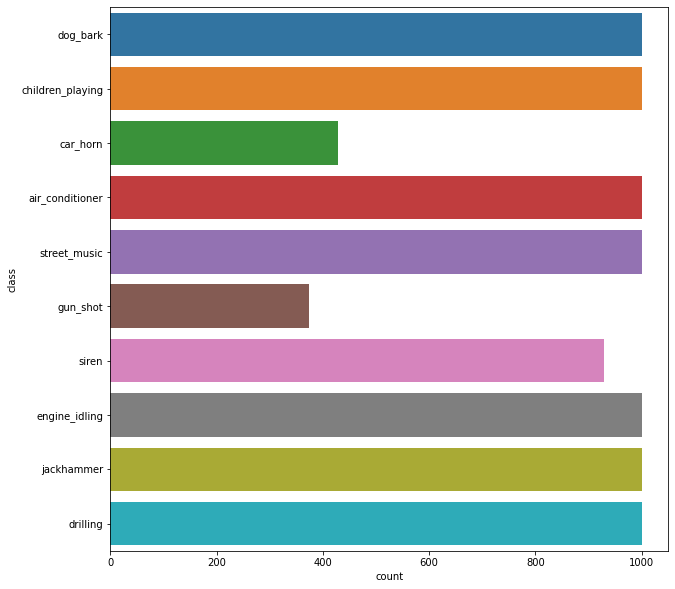

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y="class", data=urbansound8k)
print(urbansound8k["class"].value_counts())

📌 When we look at the urban data we have much less audio data with gun shot and car horn this can affect model to predict those two classes more poorly than other classes. Maybe we can try to add augmented data for those classes after seeing the result of model. Now lets listen some of the audio examples.